In [3]:
##import the data SPECT
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
#!cat SPECTtrain.txt
sp_names = ['F' + str(i) for i in range(23)]
sp_names[0] = 'diagnosis'
SP_train = pd.read_csv("SPECTtrain.txt", sep=",", names=sp_names)
SP_test = pd.read_csv("SPECTtest.txt", sep=",", names=sp_names)
SP_train.shape
SP_test.shape

(187, 23)

In [4]:
## Perceptron Learning

SP_train.diagnosis.replace(0, -1, inplace = True)
SP_test.diagnosis.replace(0, -1, inplace = True)
# r is the learning rate and Epochs is just the number of epochs 
def percepLearn_DF(X_train, y_train, X_test, y_test, r, Epochs):
    w = np.zeros(X_train.shape[1])
    for t in range(Epochs):
        for i, row in X_train.iterrows():
#            w = w + r*y_train[i]*row if (np.dot(row, w)*y_train[i] <= 0) else w
            if (np.dot(row, w)*y_train[i] <= 0):
                w = w + r*y_train[i]*row
                
    fit = X_test.dot(w)
    fit[fit<=0] = -1
    fit[fit>0] = 1
    
    E = np.sum(fit == y_test)/len(y_test)
    return [w, E]

In [5]:
## Implementation of the perceptron learning algorithm 
    
nE = np.array([10, 20, 50, 100, 300, 500])
lR = np.array([.01, .1, 1])

weights = np.zeros((len(nE)*len(lR),22))
accuracyRate = np.zeros(len(nE)*len(lR))

for i in range(len(nE)):
    for j in range(len(lR)):
        weights[j+i*len(lR)], accuracyRate[j+i*len(lR)] = percepLearn_DF(X_train = SP_train.iloc[:,1:23], 
               y_train = SP_train.iloc[:, 0], 
               X_test = SP_test.iloc[:,1:23], y_test = SP_test.iloc[:,0], 
               r = lR[j], Epochs=nE[i]) 
        print("Fitted weights of the perceptron"
              "with leanring rate %.2f and Epochs %d" %(lR[j], nE[i]) + 
              " are:\n {}".format(weights[j+len(lR)*i]) +
              "\n Accuracy Rate is %.3f" %(accuracyRate[j+len(lR)*i]))

Fitted weights of the perceptronwith leanring rate 0.01 and Epochs 10 are:
 [-0.01 -0.03 -0.04 -0.02 -0.02 -0.02  0.    0.03 -0.01 -0.01  0.01 -0.01
  0.02 -0.01  0.    0.    0.06  0.05 -0.01 -0.01 -0.02 -0.01]
 Accuracy Rate is 0.262
Fitted weights of the perceptronwith leanring rate 0.10 and Epochs 10 are:
 [-0.1 -0.2 -0.4 -0.2 -0.2 -0.2  0.   0.3 -0.1 -0.1  0.1 -0.1  0.2 -0.1  0.
 -0.1  0.6  0.5 -0.1 -0.1 -0.1 -0.1]
 Accuracy Rate is 0.310
Fitted weights of the perceptronwith leanring rate 1.00 and Epochs 10 are:
 [-2. -3. -4. -2. -2. -1.  1.  2.  0. -1.  0. -1.  1.  0.  0.  0.  7.  5.
 -1. -1. -2. -1.]
 Accuracy Rate is 0.203
Fitted weights of the perceptronwith leanring rate 0.01 and Epochs 20 are:
 [-0.02 -0.04 -0.06 -0.02 -0.03 -0.01  0.02  0.04 -0.02  0.02  0.02 -0.04
  0.02 -0.02  0.    0.    0.09  0.06 -0.01 -0.02 -0.01 -0.01]
 Accuracy Rate is 0.273
Fitted weights of the perceptronwith leanring rate 0.10 and Epochs 20 are:
 [-0.3 -0.3 -0.6 -0.2 -0.3 -0.2  0.2  0.3 -0.1  0.1 

In [6]:
## chart for Comparision of Accuracy Rates on Different Learning Rates and Epochs        
arDF = pd.DataFrame(accuracyRate.reshape((len(nE), len(lR))), 
                    columns=lR,
                    index=nE)
arDF

,0.01,0.1,1.0
10,0.262032,0.310160,0.203209
20,0.272727,0.224599,0.256684
50,0.336898,0.363636,0.320856
100,0.336898,0.315508,0.331551
300,0.401070,0.401070,0.331551
500,0.336898,0.390374,0.331551


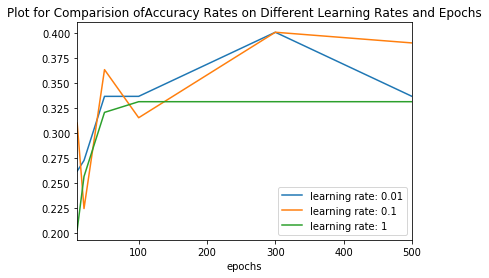

In [10]:
## plot for Comparision of Accuracy Rates on Different Learning Rates and Epochs        

%matplotlib inline
plt = arDF.plot(title='Plot for Comparision of'
                'Accuracy Rates on Different Learning Rates and Epochs')
plt.set_xlabel('epochs')
plt.legend(['learning rate: 0.01', 'learning rate: 0.1', 'learning rate: 1'])